## Ejercicio práctico

Este notebook contiene una serie de ejercicios prácticos enfocados en repasar las primeras etapas del análisis exploratorio de datos (EDA) con **PySpark**, específicamente las **estadísticas descriptivas** y la inspección básica de DataFrames.

| Comando | Función Principal | Descripción Detallada | Ejemplo Práctico |
| :--- | :--- | :--- | :--- |
| **Inspección de Estructura** | | | |
| `printSchema()` | Muestra la **estructura y tipos** de datos. | Imprime el esquema, nombres de columnas y sus tipos de datos (incluyendo nulabilidad). | \`df.printSchema()\` |
| `schema` | Obtiene el objeto **StructType** del esquema. | Devuelve el esquema del DataFrame como un objeto programable (\`StructType\`). | \`df.schema\` |
| `columns` | Lista de **nombres de columnas**. | Devuelve una lista de cadenas con los nombres de todas las columnas. | \`df.columns\` |
| `dtypes` | Lista de **nombres y tipos**. | Devuelve una lista de tuplas con el nombre de la columna y su tipo de dato. | \`df.dtypes\` |
| **Visualización y Muestreo** | | | |
| `show(n)` | Muestra las **primeras *n* filas**. | Muestra los datos del DataFrame en formato de tabla en la consola. | \`df.show(5)\` |
| `head(n)` | Devuelve las primeras *n* filas como **objetos `Row`**. | Retorna una lista de objetos \`Row\` de las primeras *n* filas para manipulación local. | \`df.head(3)\` |
| **Estadísticas Descriptivas** | | | |
| `count()` | **Cuenta** el total de filas/registros. | Devuelve el número total de filas en el DataFrame. | \`df.count()\` |
| `describe()` | Estadísticas **solo para columnas numéricas**. | Calcula \`count\`, \`mean\`, \`stddev\`, \`min\` y \`max\` para columnas numéricas. | \`df.describe().show()\` |
| `summary()` | Estadísticas para **todas las columnas**. | Proporciona estadísticas descriptivas para columnas numéricas y categóricas (incluyendo percentiles). | \`df.summary().show()\` |
| **Selección y Manipulación** | | | |
| `select()` | **Selecciona** columnas específicas. | Proyecta un nuevo DataFrame que contiene solo las columnas seleccionadas. | \`df.select('col1', 'col2').show()\` |
| `filter()` | **Filtra** filas por una condición. | Devuelve un DataFrame con las filas que cumplen la expresión booleana. | \`df.filter(df['col'] > 10).show()\` |
| `distinct()` | Elimina **filas duplicadas**. | Devuelve un DataFrame con filas únicas. | \`df.distinct().show()\` |
| `orderBy()` | **Ordena** el DataFrame. | Ordena el DataFrame según una o más columnas, de forma ascendente o descendente. | \`df.orderBy('col', ascending=False).show()\` |
| `groupBy().agg()` | **Agrupa** y **agrega** datos. | Agrupa los datos por una o más columnas y realiza operaciones de agregación (media, suma, etc.). | \`df.groupBy('col').agg({'other_col': 'mean'}).show()\` |

### Actividad 0:
Crea una sesión de Spark y lee el archivo CSV en un DataFrame de Spark


#### Cargamos el dataset

Enlace:
https://opendata-ajuntament.barcelona.cat/data/es/dataset/pad_nai_mdbas/resource/43b15838-3724-4dae-a096-1eaf4a345ef7

### Información del dataset:
https://opendata-ajuntament.barcelona.cat/data/es/dataset/pad_nai_mdbas



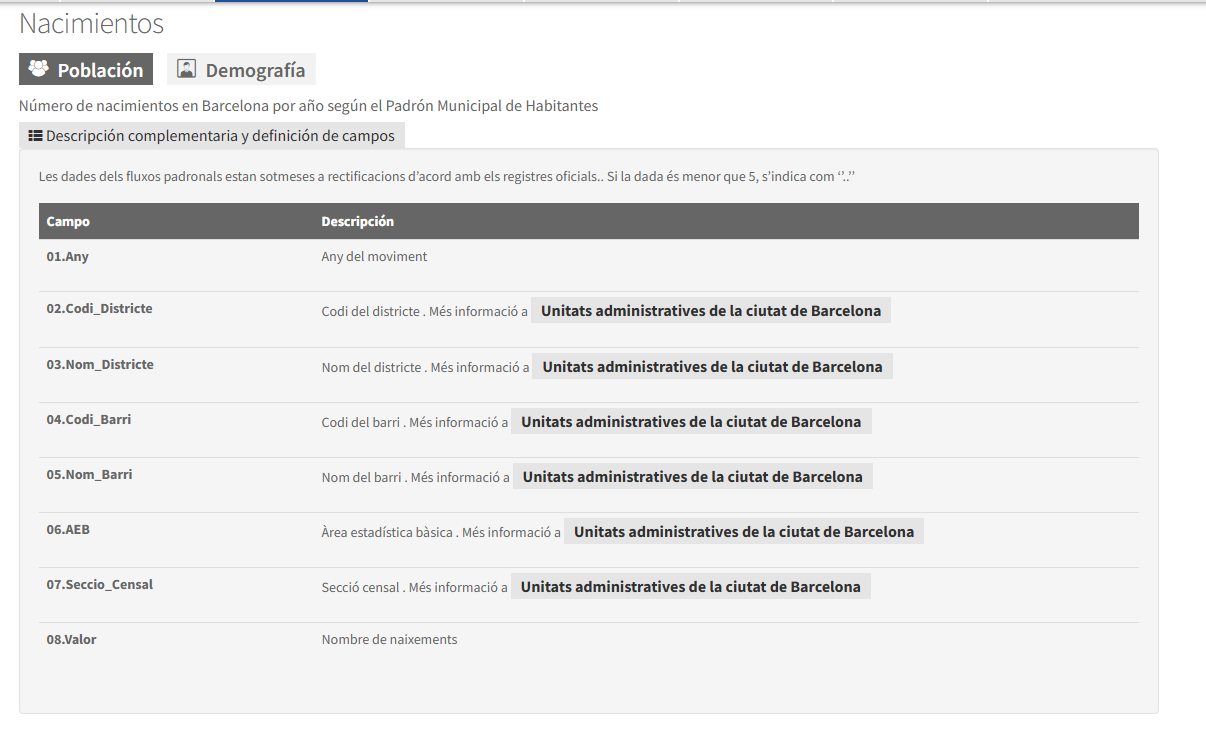


In [19]:
# Instalación
#pip install requests
#pip install pandas
#pip install pyspark

import requests
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg



In [20]:
params = {'resource_id': '43b15838-3724-4dae-a096-1eaf4a345ef7', 'limit': 1067}

response = requests.get('https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search', params=params)
response.raise_for_status()

data = response.json()
records = data['result']['records']
df = pd.DataFrame.from_records(records)

df

,Codi_Districte,Nom_Districte,Nom_Barri,AEB,Seccio_Censal,Valor,Codi_Barri,_id,Any
0,1,Ciutat Vella,el Raval,1,1001,7,1,1,2024
1,1,Ciutat Vella,el Raval,1,1002,10,1,2,2024
2,1,Ciutat Vella,el Raval,2,1003,41,1,3,2024
3,1,Ciutat Vella,el Raval,2,1004,22,1,4,2024
4,1,Ciutat Vella,el Raval,3,1005,19,1,5,2024
...,...,...,...,...,...,...,...,...,...
1062,10,Sant Martí,la Verneda i la Pau,232,10139,6,73,1063,2024
1063,10,Sant Martí,la Verneda i la Pau,233,10140,9,73,1064,2024
1064,10,Sant Martí,la Verneda i la Pau,233,10141,..,73,1065,2024
1065,10,Sant Martí,la Verneda i la Pau,233,10142,12,73,1066,2024


Si queremos cargar el dataset como lo hacemos habitualmente

```python

import csv

df_2 = pd.read_csv('2024_pad_nai_mdbas.csv')


spark = (
    SparkSession.builder
    .appName("Ejercicios con PySpark Nacimiento")
    #.master("local[*]")
    .getOrCreate()
)


sdf = spark.createDataFrame(df_2)


```

Si trabajan desde Google Colab recuerden que deben cargar el dataframe, debe quedar así:

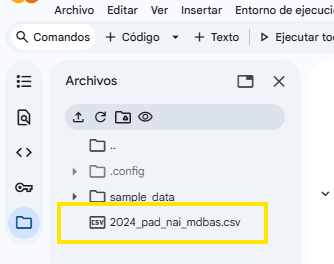

Si tienen dudas, se recomienda mirar el práctico anterior :)

In [21]:
spark = (
    SparkSession.builder
    .appName("Ejercicios con PySpark Nacimiento")
    .getOrCreate()
)

In [22]:
sdf = spark.createDataFrame(df)

### Actividad 1:
Muestra el esquema del Spark DataFrame (`sdf`) para revisar los tipos de datos inferidos.

In [23]:
# Ingresar código

### Actividad 2:
Muestra los primeros **15** registros del `sdf`.

In [24]:
# Ingresar código

### Actividad 3:
Muestra la lista de nombres de las columnas del DataFrame.

In [25]:
# Ingresar código

### Actividad 4:
Cambia el nombre de la columna "AEB" a "AEB_2"


Verifica si el cambio se realizó correctamente

In [26]:
# Ingresar código

In [27]:
# Ingresar código

### Actividad 5:
Muestra los tipos de datos de cada columna.

In [28]:
# Ingresar código

### Actividad 6:
Selecciona y muestra la columna `"Nom_Districte"`.

In [29]:
# Ingresar código

### Actividad 7:

Verificar la consistencia de los datos, ordenando el DataFrame por tres columnas:
1.  `Nom_Districte` (Ascendente)
2.  `Nom_Barri` (Ascendente)
3.  `Any` (Descendente)

In [30]:
# Ingresar código

### Actividad 8:

Filtrar las filas donde en "Nom_Barri" es "Sants"

In [31]:
# Ingresar código

### Actividad 9:
Calcula el número total de registros por "Nom_Barri"



In [32]:
# Ingresar código

### Actividad 10:
Muestra todos los valores distintos de la columna "Nom_Barri", asegurándote de que el listado esté ordenado alfabéticamente.


In [33]:
# Ingresar código

### Actividad 11:

Muestra los estadisticos descriptivos de todo el sdf

In [34]:
# Ingresar código

### Actividad 12:

Proporciona los estadisticos descriptivos de "Codi_Districte".

¿Tiene sentido lo que vemos?


In [35]:
# Ingresar código

### Actividad 13
Ingresa la última actividad que es necesaria realizar

In [36]:
# Ingresar código